In [35]:
import sys
sys.path.append('../../../vysxd')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from vysxd_define import *
from vysxd_analysis import *
from FPC_define import *
from scipy.ndimage import gaussian_filter
%matplotlib inline

In [36]:
# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3/MS/DENSITY/electrons/charge/')
# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1_sin2driver/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.11_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.11_sin2driver/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.05_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.05_sin2driver/MS/DENSITY/electrons/charge/')

e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('EPW-alves/MS/FLD/e1/')
edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('EPW-alves/MS/DENSITY/electrons/charge/')

In [37]:
A, B = FPC('EPW-alves/')

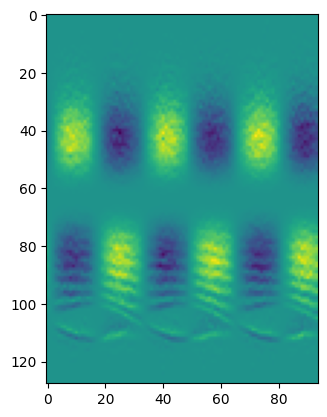

In [44]:
plt.imshow(B[:,:,10])

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


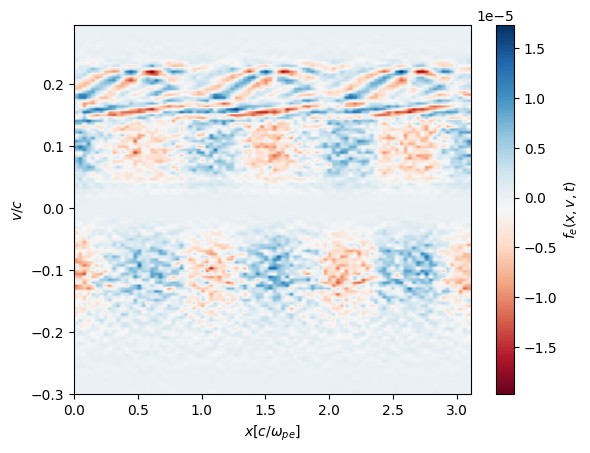

In [68]:
B.shape
T = np.linspace(0,100,21)
print(T)
G = 17
dwdt_time_int = np.trapz(B[:,:,5:G], T[5:G], axis=2)
#B.shape
dwdt_time_int.shape
p0 = vysxd_get_data('EPW-alves/MS/PHA/p1x1/electrons/p1x1-electrons-000000.h5')
plt.imshow(dwdt_time_int, origin='lower', extent=[p0.X[0], p0.X[-1],p0.Y[0],p0.Y[-1]], aspect='auto', cmap = 'RdBu')
plt.colorbar(label=r'$f_e(x,v,t)$')
plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
plt.ylabel(r'$v/c$')
dwdt_space_int = np.trapz(B[:,:,:],x[1:-1],axis=1)
#plt.imshow(dwdt_space_int, origin ='lower', extent=[t[0], t[-1], p0.Y[0],p0.Y[-1]], aspect='auto', cmap = 'RdBu')